In [1]:
import matplotlib.pyplot as plt

In [2]:
import golftrainer.factory

In [3]:
json_fname = "../../data/demo.json"
gd = golftrainer.factory.create_golf_data(json_fname)

In [4]:
gd.video_spec

VideoSpec(height=768, width=432, num_frames=136, fps=30, scale=100, rotate='')

In [5]:
df = gd.cart_data_frame()

In [6]:
print(list(df.columns))

['nose_x', 'nose_y', 'left_eye_inner_x', 'left_eye_inner_y', 'left_eye_x', 'left_eye_y', 'left_eye_outer_x', 'left_eye_outer_y', 'right_eye_inner_x', 'right_eye_inner_y', 'right_eye_x', 'right_eye_y', 'right_eye_outer_x', 'right_eye_outer_y', 'left_ear_x', 'left_ear_y', 'right_ear_x', 'right_ear_y', 'mouth_left_x', 'mouth_left_y', 'mouth_right_x', 'mouth_right_y', 'left_shoulder_x', 'left_shoulder_y', 'right_shoulder_x', 'right_shoulder_y', 'left_elbow_x', 'left_elbow_y', 'right_elbow_x', 'right_elbow_y', 'left_wrist_x', 'left_wrist_y', 'right_wrist_x', 'right_wrist_y', 'left_pinky_x', 'left_pinky_y', 'right_pinky_x', 'right_pinky_y', 'left_index_x', 'left_index_y', 'right_index_x', 'right_index_y', 'left_thumb_x', 'left_thumb_y', 'right_thumb_x', 'right_thumb_y', 'left_hip_x', 'left_hip_y', 'right_hip_x', 'right_hip_y', 'left_knee_x', 'left_knee_y', 'right_knee_x', 'right_knee_y', 'left_ankle_x', 'left_ankle_y', 'right_ankle_x', 'right_ankle_y', 'left_heel_x', 'left_heel_y', 'right_he

In [8]:
df

,nose_x,nose_y,left_eye_inner_x,left_eye_inner_y,left_eye_x,left_eye_y,left_eye_outer_x,left_eye_outer_y,right_eye_inner_x,right_eye_inner_y,...,left_heel_x,left_heel_y,right_heel_x,right_heel_y,left_foot_index_x,left_foot_index_y,right_foot_index_x,right_foot_index_y,club_head_x,club_head_y
0,198.0,486.0,198.0,493.0,196.0,494.0,195.0,495.0,200.0,492.0,...,129.0,216.0,129.0,200.0,171.0,218.0,178.0,206.0,324.0,202.0
1,197.0,485.0,197.0,493.0,196.0,494.0,195.0,495.0,200.0,492.0,...,128.0,216.0,127.0,201.0,169.0,219.0,177.0,204.0,324.0,202.0
2,197.0,486.0,198.0,494.0,197.0,495.0,196.0,495.0,200.0,493.0,...,129.0,218.0,127.0,201.0,170.0,220.0,177.0,204.0,324.0,202.0
3,197.0,486.0,197.0,494.0,195.0,495.0,194.0,496.0,200.0,492.0,...,128.0,215.0,128.0,204.0,170.0,218.0,177.0,205.0,324.0,202.0
4,200.0,487.0,200.0,494.0,199.0,495.0,198.0,495.0,202.0,493.0,...,131.0,217.0,130.0,203.0,175.0,216.0,181.0,205.0,324.0,202.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,201.0,503.0,201.0,509.0,199.0,510.0,197.0,511.0,206.0,507.0,...,137.0,218.0,190.0,226.0,140.0,211.0,194.0,203.0,0.0,768.0
132,201.0,505.0,201.0,511.0,199.0,512.0,197.0,513.0,206.0,509.0,...,134.0,217.0,189.0,220.0,154.0,221.0,193.0,207.0,0.0,768.0
133,199.0,505.0,199.0,511.0,197.0,512.0,195.0,513.0,204.0,509.0,...,136.0,220.0,188.0,232.0,142.0,212.0,192.0,208.0,0.0,768.0
134,200.0,505.0,199.0,511.0,198.0,512.0,196.0,512.0,204.0,509.0,...,136.0,220.0,189.0,231.0,139.0,214.0,192.0,206.0,0.0,768.0


In [9]:
import pandas as pd
import math

def calculate_angle(v1, v2):
    """Calculate angle between two vectors in degrees."""
    dot_product = sum(v1_i * v2_i for v1_i, v2_i in zip(v1, v2))
    magnitude_v1 = math.sqrt(sum(v1_i**2 for v1_i in v1))
    magnitude_v2 = math.sqrt(sum(v2_i**2 for v2_i in v2))
    if magnitude_v1 == 0 or magnitude_v2 == 0:
        angle =  0
    else:
        angle = math.acos(dot_product / (magnitude_v1 * magnitude_v2))
    return math.degrees(angle)

def get_vectors(df):
    return [(df.iloc[i+1]['x'] - df.iloc[i]['x'], df.iloc[i+1]['y'] - df.iloc[i]['y']) 
           for i in range(len(df) - 1)]

def get_angles(vectors):
    return [0] + [calculate_angle(vectors[i], vectors[i+1]) if i < len(vectors) - 1 else None 
                   for i in range(len(vectors))]
def distance(df, i, j):
    '''compute the distance using the x and y columns from index i to j'''
    x1, y1 = df.loc[i, 'x'], df.loc[i, 'y']
    x2, y2 = df.loc[j, 'x'], df.loc[j, 'y']
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

def speed(df, fps, i=None, j=None):
    if i is None:
        i = 0
    if j is None:
        j = len(df) - 1
    num_frames = j - i
    time_secs = num_frames/fps
    return distance(df, i, j) / time_secs

A golf swing has the following phases.
1. Backswing: From the start the club head is moving in a straight line till there is a sharp change in angle (> 100 degrees)
2. Transition A: The club head is now moving in positive 'x' direction till it stops and reverses direction.
3. Transition B: The club head is moving downward till a sharp change in angle.
4. Downswing: Club head is moving in positive direction till it reaches close to the start position. This is the impact point.
5. Follow Through: After impact.
6. Finish: Club head reverses direction

Visually 
1. Backswing from 0 to 70
2. TransitionA from 71 to 80
3. TransitonB from 81 to 86 (Frame 86 is the highest y value)
4. Downswing from 87 having impact at frame 90
5. Follow Through: 81 to 96 (Frame 96 is the highest y value)
6. Finish from 96 to 105 (end)

In [10]:
ch = df[["club_head_x", "club_head_y"]].rename(columns={"club_head_x": "x", "club_head_y": "y"}).astype(int)

In [11]:
ch

,x,y
0,324,202
1,324,202
2,324,202
3,324,202
4,324,202
...,...,...
131,0,768
132,0,768
133,0,768
134,0,768


In [12]:
angles = get_angles(get_vectors(ch))
angles = [0 if x is None else x for x in angles]

In [13]:
indices = [index for index, value in enumerate(angles) if value > 100]

In [258]:
indices

[70, 80, 85, 89]

In [275]:
backswing = ch[0:indices[0]]
transA = ch[indices[0]: indices[1]].reset_index(drop=True)
transB = ch[indices[1]: indices[2]].reset_index(drop=True)
downswing = ch[indices[2]: indices[3]].reset_index(drop=True)
finish = ch[indices[3]:].reset_index(drop=True)

In [276]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

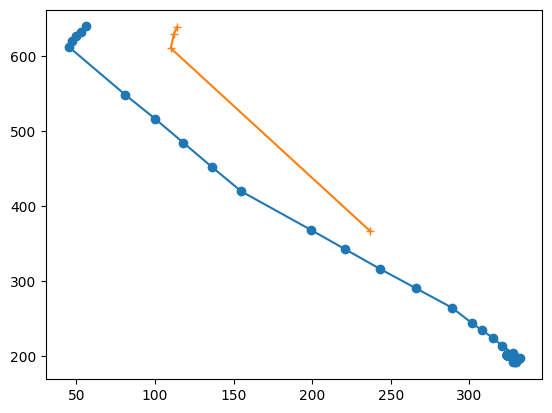

In [277]:
plt.plot(backswing['x'], backswing['y'], marker='o')
plt.plot(downswing['x'], downswing['y'], marker='+')

**Club Head Speed**

Calculate the speed of the club head in the backswing and downswing.
We know the fps and so just get the distance in pixels.
Intent is that the back_speed should be say 10x slower than downswing.

In [285]:

back_speed = speed(backswing, gd.video_spec.fps)
print(f"BackSpeed={int(back_speed)} pixels/sec")


BackSpeed=223 pixels/sec


In [286]:
down_speed = speed(downswing, gd.video_spec.fps)
print(f"DownSpeed={int(down_speed)} pixels/sec")

DownSpeed=2985 pixels/sec


Calcuate the impact frame
1. The position of the club head is closest to the starting position.
2. It must be after the backswing.
   

In [288]:
golf_ball = (backswing.iloc[0]['x'], backswing.iloc[0]['y'])
golf_ball


(324, 202)

In [290]:
import numpy as np
distances = np.sqrt((ch['x'] - golf_ball[0])**2 + (ch['y'] - golf_ball[1])**2)

In [292]:
impact_idx = distances[len(backswing):].idxmin()
print(f"Impact frame is at {impact_idx}")

Impact frame is at 90


**Reversal For Backswing to Downswing**

Find the point at which the direction changes.

In [294]:
ch['delta_x'] = ch['x'].diff()
sign_change_x = ((ch['delta_x'].shift(1) * ch['delta_x']) < 0)
reversal_indices = ch[sign_change_x].index
reversal_indices

Index([41, 66, 81, 88, 91], dtype='int64')

In [297]:
tmp = [i for i in reversal_indices if i > len(backswing)][0]
print(f"Transition from back to down swing happens  on frame={tmp}")

Transition from back to down swing happens  on frame=81


**Head Movement**

At impact frame the head should be at the same position as the starting frame.

At highest y point in the backswing the head should not move.

In [307]:
x1, y1 = (df.iloc[0]['nose_x'], df.iloc[0]['nose_y'])
x1, y1

(198.0, 486.0)

In [308]:
x2, y2 = (df.iloc[impact_idx]['nose_x'], df.iloc[impact_idx]['nose_y'])
x2, y2

(220.0, 457.0)

In [303]:
 dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)


In [306]:
if y2 > y1:
    print(f"Head moved up by {int(dist)} pixels during impact")
else:
    print(f"Head moved down by {int(dist)} pixels during impact")

Head moved down by 36 pixels during impact


In [310]:
n = len(backswing)
high_idx = ch['y'][:n].idxmax()
print(f"Found the club head at highest point in frame_idx={high_idx}")

Found the club head at highest point in frame_idx=69


In [313]:
x1, y1 = (df.iloc[0]['right_ear_x'], df.iloc[0]['right_ear_y'])
x1, y1

(197.0, 490.0)

In [314]:
x2, y2 = (df.iloc[high_idx]['right_ear_x'], df.iloc[high_idx]['right_ear_y'])
x2, y2

(207.0, 472.0)

In [315]:
if y2 > y1:
    print(f"Head moved up by {int(dist)} pixels during backswing")
else:
    print(f"Head moved down by {int(dist)} pixels during backswin")

Head moved down by 36 pixels during backswin
